In [2]:
from rfdetr import RFDETRMedium

In [6]:
dataset_location = "./dataset"

In [ ]:
model = RFDETRMedium()
model.train(dataset_dir=dataset_location, epochs=2, batch_size=8, grad_accum_steps=2, lr=1e-2)

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


num_classes mismatch: model has 90 classes, but your dataset has 2 classes
reinitializing your detection head with 2 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=2, grad_accum_steps=2, amp=True, lr=0.01, lr_encoder=0.00015, batch_size=8, weight_decay=0.0001, epochs=2, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-medium.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[3, 6, 9, 12], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=4, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=16

fatal: not a git repository (or any of the parent directories): .git


Epoch: [0]  [0/5]  eta: 0:02:06  lr: 0.010000  class_error: 51.28  loss: 16.8468 (16.8468)  loss_ce: 0.3398 (0.3398)  loss_bbox: 0.9296 (0.9296)  loss_giou: 1.9307 (1.9307)  loss_ce_0: 0.3348 (0.3348)  loss_bbox_0: 1.2118 (1.2118)  loss_giou_0: 2.0599 (2.0599)  loss_ce_1: 0.3528 (0.3528)  loss_bbox_1: 1.0033 (1.0033)  loss_giou_1: 1.8968 (1.8968)  loss_ce_2: 0.3409 (0.3409)  loss_bbox_2: 0.9601 (0.9601)  loss_giou_2: 1.9376 (1.9376)  loss_ce_enc: 0.3376 (0.3376)  loss_bbox_enc: 1.1876 (1.1876)  loss_giou_enc: 2.0233 (2.0233)  loss_ce_unscaled: 0.3398 (0.3398)  class_error_unscaled: 51.2821 (51.2821)  loss_bbox_unscaled: 0.1859 (0.1859)  loss_giou_unscaled: 0.9654 (0.9654)  cardinality_error_unscaled: 3590.1250 (3590.1250)  loss_ce_0_unscaled: 0.3348 (0.3348)  loss_bbox_0_unscaled: 0.2424 (0.2424)  loss_giou_0_unscaled: 1.0300 (1.0300)  cardinality_error_0_unscaled: 3632.7500 (3632.7500)  loss_ce_1_unscaled: 0.3528 (0.3528)  loss_bbox_1_unscaled: 0.2007 (0.2007)  loss_giou_1_unscaled: 0

Epoch: [1]  [0/5]  eta: 0:04:25  lr: 0.010000  class_error: 0.00  loss: 14.9622 (14.9622)  loss_ce: 0.8134 (0.8134)  loss_bbox: 0.3490 (0.3490)  loss_giou: 2.0431 (2.0431)  loss_ce_0: 0.7692 (0.7692)  loss_bbox_0: 0.3651 (0.3651)  loss_giou_0: 2.0320 (2.0320)  loss_ce_1: 0.5880 (0.5880)  loss_bbox_1: 0.3564 (0.3564)  loss_giou_1: 2.0254 (2.0254)  loss_ce_2: 0.3101 (0.3101)  loss_bbox_2: 0.3721 (0.3721)  loss_giou_2: 2.0241 (2.0241)  loss_ce_enc: 0.4558 (0.4558)  loss_bbox_enc: 0.3675 (0.3675)  loss_giou_enc: 2.0908 (2.0908)  loss_ce_unscaled: 0.8134 (0.8134)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0698 (0.0698)  loss_giou_unscaled: 1.0216 (1.0216)  cardinality_error_unscaled: 0.1250 (0.1250)  loss_ce_0_unscaled: 0.7692 (0.7692)  loss_bbox_0_unscaled: 0.0730 (0.0730)  loss_giou_0_unscaled: 1.0160 (1.0160)  cardinality_error_0_unscaled: 0.1250 (0.1250)  loss_ce_1_unscaled: 0.5880 (0.5880)  loss_bbox_1_unscaled: 0.0713 (0.0713)  loss_giou_1_unscaled: 1.0127 (1.0127) 

In [7]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset_location}/test",
    annotations_path=f"{dataset_location}/test/_annotations.coco.json",
)

In [10]:
model.optimize_for_inference()

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


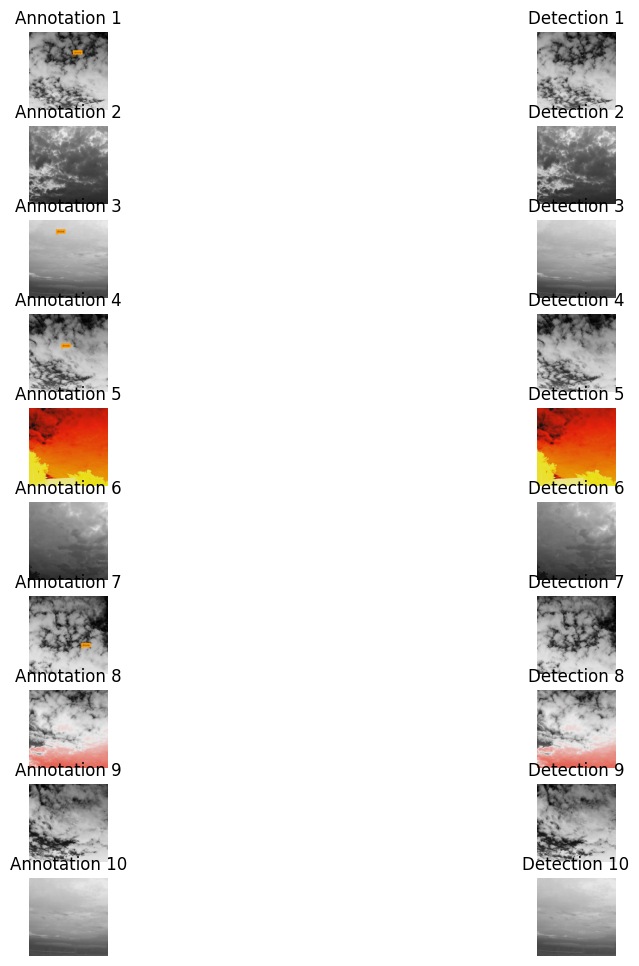

In [12]:
from PIL import Image

images = []
titles = []

for i in range(10):
  path, image, annotations = ds[i]
  image = Image.open(path)
  detections = model.predict(image, threshold=0.5)

  text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
  thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)
  color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
  ])

  bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
  label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale)

  annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id in annotations.class_id
  ]

  detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
  ]

  annotation_image = image.copy()
  annotation_image = bbox_annotator.annotate(annotation_image, annotations)
  annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

  detections_image = image.copy()
  detections_image = bbox_annotator.annotate(detections_image, detections)
  detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

  images.extend([annotation_image, detections_image])
  titles.extend([f"Annotation {i+1}", f"Detection {i+1}"])

sv.plot_images_grid(images=images, grid_size=(10, 2), titles=titles)